# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [69]:

from dotenv import load_dotenv
load_dotenv(override=True)

True

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [70]:

import os
from dotenv import load_dotenv
from langsmith import Client 
from openai import OpenAI
from langchain.prompts.chat import ChatPromptTemplate
from langsmith.client import convert_prompt_to_openai_format 

load_dotenv(override=True) 

MODEL_NAME = "gpt-5-mini" 
client = Client()

openai_client = OpenAI()

print(f"Client initialized. Model set to {MODEL_NAME}.")

Client initialized. Model set to gpt-5-mini.


Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [71]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:a5a20427")

In [72]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'a5a2042790873cc35d5b923f7067723621b9410ce248d4cd22a9e20372c8d31a'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak {language} fluently but mix in futuristic slang.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [73]:
hydrated_prompt = prompt.invoke({"question": "What ancient technology do humans still use?", "language": "Hindi"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak Hindi fluently but mix in futuristic slang.', additional_kwargs={}, response_metadata={}), HumanMessage(content='What ancient technology do humans still use?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [74]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-5-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CNxxCqnBNS70zGAuHFDvX9clT1MnG', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Badiya sawaal — time-travel vibe leke bolun toh bahut saari “ancient” technologies aisi hain jo aaj bhi seedha ya evolved form mein chal rahi hain. Neeche kuch major examples aur unka short origin + modern roop diye hain — ek tarah ka retro-tech inventory.  \n\n- Pahiya (Wheel) — (≈3500 BCE, Mesopotamia): gaadi, bearings aur turbines tak sabka base. Wheel ka concept mechanical motion ka foundation hai.  \n- Kheti, hal aur sinchai (Agriculture, plow, irrigation) — (Neolithic, ≈9000–4000 BCE): organized farming, canals, drip/modern irrigation bhi isi lineage se evolve hua.  \n- Loha aur kaans (Metallurgy: Bronze/Iron) — (Bronze Age ≈3300 BCE, Iron Age ≈1200 BCE): metal alloys aur smelting ke principles hi modern metallurgy, aerospace alloys aur electronics ka base hain.  \n- Likhan aur printing (Writing, papyrus/紙, printing press

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [75]:

from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:a5a20427", include_model=True)

c:\Users\Raghav Gupta\anaconda3\envs\langsmith_env\lib\json\decoder.py:337: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [76]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'a5a2042790873cc35d5b923f7067723621b9410ce248d4cd22a9e20372c8d31a'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak {language} fluently but mix in futuristic slang.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output

Test out your prompt!

In [77]:
prompt.invoke({"question": "What ancient technology do humans still use?", "language": "Hindi"})

{'answer': 'Namaste — mast sawaal. Bahut si “ancient” technologies aaj bhi daily life ka core hain. Kuch clear examples, time-warp style: \n\n1) Wheel — 3500 BCE se aaya, aaj bhi vehicles, machinery ke gears aur turbines ka základ hai. Simple circular motion ka funda abhi bhi chal raha hai. \n2) Writing & numbers — cuneiform/alphabets se evolve hua; script, ledgering, aur mathematical notation (zero ka concept India se) modern computing aur finance ka base hai. \n3) Agriculture tools & irrigation — hal (plow), kheti ke patterns, canals aur drip irrigation tak, food production ka root ancient ideas pe hi hai. \n4) Metallurgy — bronze/iron smelting ka basic idea se lekar aaj ki alloy/steel industry tak continuum hai. \n5) Masonry, arches & concrete — Roman concrete aur arch techniques se banne wali bridges/buildings ki engineering ab bhi use hoti hai (modern materials ke saath). \n6) Sailing & navigation — sailboats aur celestial navigation ke principles wind/route planning aur modern sa

### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

In [78]:
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:55f7049e", include_model=True)

c:\Users\Raghav Gupta\anaconda3\envs\langsmith_env\lib\json\decoder.py:337: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


Run this commit!

In [79]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "Tell me something about World War 2?", "language": "Chinese"})
converted_messages = convert_prompt_to_openai_format(messages=[hydrated_prompt.get('answer')])["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CNxyAd7lVQBZ5phrt2mm2FfWGITFc', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='第二次世界大战（1939-1945）是人类历史上最为浩大且破坏性最强的战争之一，其起因复杂多样。战争的主要参战方包括轴心国（以德国、日本、意大利为主）和同盟国（英国、苏联、美国、中国等）。一战后，凡尔赛体系的脆弱性、经济大萧条、极端民族主义以及领土扩张等因素，共同推动了这一全球性的冲突。\n\n战争于1939年爆发，德国入侵波兰成为导火索，随之英国和法国对德国宣布了战争。德国迅速占领了西欧的大部分地区。1941年，德国发动了名为“巴巴罗萨行动”的对苏联的全面进攻，而同年日本袭击珍珠港，导致美国正式参战。战争中的一些重要战役包括不列颠空战、斯大林格勒战役、阿拉曼战役、中途岛海战以及1944年的诺曼底登陆（D日）等。\n\n1945年，德国于5月宣布投降，随后美国在广岛和长崎投下原子弹，结合苏联对日本宣战，日本则于8月宣布投降，正式签署投降协议的时间是9月，标志着第二次世界大战的结束。此次战争造成的人员伤亡惨重，估计总死亡人数在5000万到7000万之间，此外，还有大规模的平民伤亡、集中营屠杀（纳粹对犹太人大屠杀约600万遇难）、难民潮以及城市的严重破坏。\n\n战争的结束深刻地改变了世界格局，联合国应运而生，冷战格局随之形成，殖民体系也加速瓦解。同时，战争推动了科技和军事技术的迅速发展，并在伦理、法律与历史记忆等方面留下了深远的影响。', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1759828102, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(c

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [80]:
from langchain.prompts.chat import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a professional AI assistant from 2100"),
    ("user", "Ask the user to rewrite this sentence in a {language}: {question}")
])

inputs = {"question": "Who is Lionel Messi?", "language": "German"}

hydrated_prompt = prompt.invoke(inputs)

print("Prompt successfully hydrated.")

Prompt successfully hydrated.


You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [83]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-5-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model

client.push_prompt("french-rag-prompt-final-tweak", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt-final-tweak/75567b82?organizationId=6072fe80-253a-475b-81f3-74f20971421c'

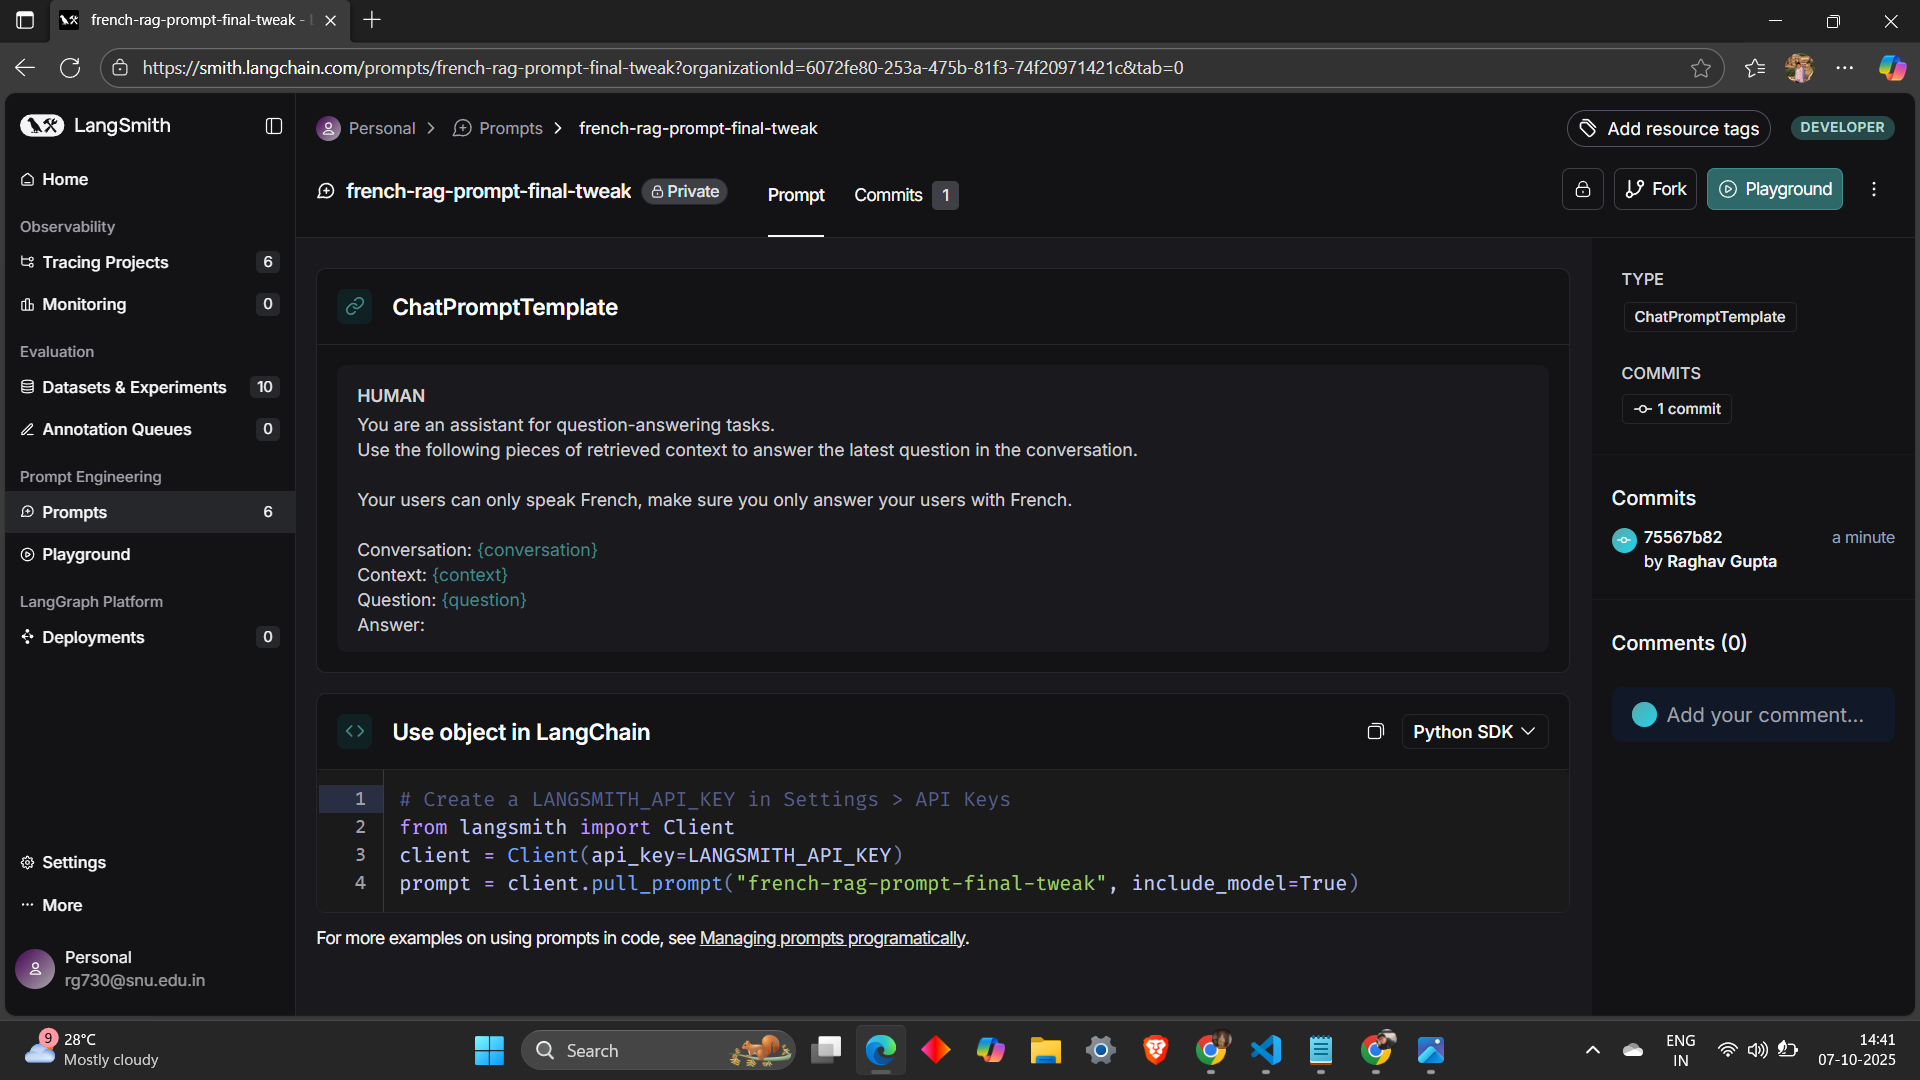

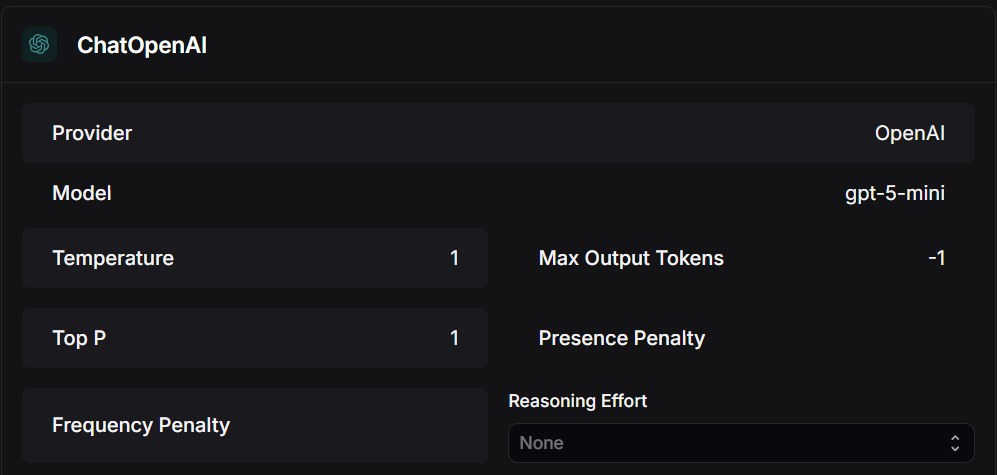